# Project: Exploratory Data Analysis on Indian Mutual Funds

## 🎯 Objective:
Analyze Indian mutual fund schemes across categories to uncover trends, compare performance, and derive insights that can guide investment decisions.

### Key Questions:
- Which mutual fund categories perform best over 1Y, 3Y, and 5Y?
- How does the expense ratio impact returns?
- What role does AUM play in fund performance?
- What are the trends in NAV over time?

Dataset: [Mutual Funds India - Detailed](https://www.kaggle.com/datasets/ravibarnawal/mutual-funds-india-detailed)


### Below block is enhancment tbd later

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ravibarnawal/mutual-funds-india-detailed")

# print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

### importing the file from the downloaded path

In [2]:
df = pd.read_csv("comprehensive_mutual_funds_data.csv")
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


### Understand the data

In [3]:
# dimensions
df.shape

# data types and non-null values
# df.info()

# Summary statistics of numeric columns
# df.describe(include='all')

# Check for missing values
# df.isnull().sum()

# Check for duplicates
# df.duplicated().sum()

(814, 20)

In [4]:
#df['fund_manager'].unique()

### dropping duplicates across 3 columns combined

In [5]:
df = df.drop_duplicates(subset=['scheme_name', 'category', 'sub_category'], keep='first').reset_index(drop=True)


In [6]:
cols_to_convert = ['alpha', 'beta', 'sharpe', 'sortino', 'sd']
#errors='coerce': Any non-convertible values (like '--', '-', NaN, etc.) become NaN

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,789.000000,789.000000,789.000000,789.000000,789.000000,766.000000,747.000000,765.000000,747.000000,766.000000,789.000000,789.000000,789.000000,768.000000,631.000000
mean,540.176172,3073.179975,0.703511,3906.174056,8.376426,2.638198,2.475823,10.172157,0.820281,1.196945,4.378961,2.684411,3.992395,18.322917,9.451981
std,365.609595,2517.973679,0.478992,7267.066723,2.630648,1.404199,3.906787,7.857378,1.331071,0.539699,1.828875,1.443706,6.747908,12.094346,3.728457
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,200.000000,7.000000,1.710000,0.545000,2.050000,0.690000,0.920000,3.000000,2.000000,1.600000,6.175000,6.700000
50%,500.000000,5000.000000,0.600000,1003.000000,10.000000,2.855000,1.840000,12.030000,0.860000,1.290000,6.000000,3.000000,4.400000,18.150000,8.900000
75%,1000.000000,5000.000000,1.010000,3977.000000,10.000000,3.470000,3.825000,16.490000,0.970000,1.540000,6.000000,4.000000,5.600000,27.000000,12.100000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,12.570000,27.240000,77.720000,5.400000,3.520000,6.000000,5.000000,130.800000,71.400000,23.200000


In [7]:
print(f"Number of unique schemes {len(df['scheme_name'].unique())}")

Number of unique schemes 789


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    789 non-null    object 
 1   min_sip        789 non-null    int64  
 2   min_lumpsum    789 non-null    int64  
 3   expense_ratio  789 non-null    float64
 4   fund_size_cr   789 non-null    float64
 5   fund_age_yr    789 non-null    int64  
 6   fund_manager   789 non-null    object 
 7   sortino        766 non-null    float64
 8   alpha          747 non-null    float64
 9   sd             765 non-null    float64
 10  beta           747 non-null    float64
 11  sharpe         766 non-null    float64
 12  risk_level     789 non-null    int64  
 13  amc_name       789 non-null    object 
 14  rating         789 non-null    int64  
 15  category       789 non-null    object 
 16  sub_category   789 non-null    object 
 17  returns_1yr    789 non-null    float64
 18  returns_3y

In [9]:
df[['alpha', 'beta', 'sharpe', 'sortino', 'sd','returns_3yr','returns_5yr']].isnull().sum()

alpha           42
beta            42
sharpe          23
sortino         23
sd              24
returns_3yr     21
returns_5yr    158
dtype: int64

### Mediam Imputation for Null values

In [10]:
metrics=['alpha', 'beta', 'sharpe', 'sortino', 'sd','returns_3yr','returns_5yr']
df[metrics] = df[metrics].fillna(df[metrics].median())
df[metrics].isnull().sum()

alpha          0
beta           0
sharpe         0
sortino        0
sd             0
returns_3yr    0
returns_5yr    0
dtype: int64

 #### Question:
 Find the Fund manager that is handling the most assests (having max AUM of all managed funds together)

In [11]:
aum_managed_order = df.groupby('fund_manager')['fund_size_cr'].sum().sort_values(ascending=False)

In [12]:
top_10_by_aum = aum_managed_order.head(10)
print(top_10_by_aum)

fund_manager
Rahul Goswami        131306.0
Sankaran Naren       131044.0
R Srinivasan         117499.0
Deepak Agrawal       112477.0
R Arun               105288.0
Kaustubh Gupta        93460.0
Anupam Joshi          87273.0
Chirag Setalvad       74543.0
Gopal Agrawal         64166.0
Shreyash Devalkar     62046.0
Name: fund_size_cr, dtype: float64


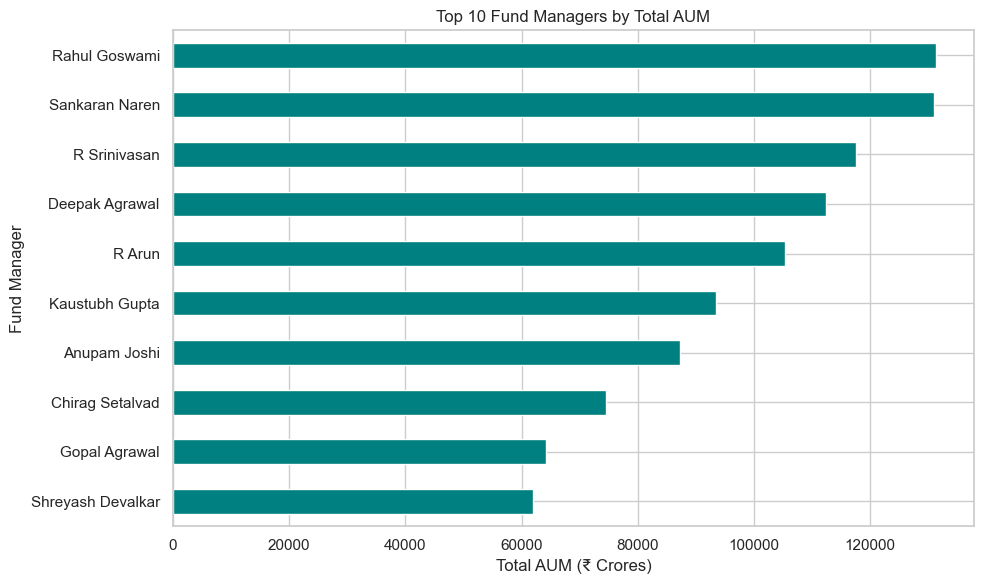

In [13]:
top_10_by_aum.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Top 10 Fund Managers by Total AUM")
plt.xlabel("Total AUM (₹ Crores)")
plt.ylabel("Fund Manager")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [14]:
amc_by_manager = df.groupby('fund_manager')['amc_name'].unique().reset_index()
amc_by_manager.columns = ['fund_manager', 'amc_list']

amc_by_manager.describe()

,fund_manager,amc_list
count,260,260
unique,260,40
top,Abhinav Khandelwal,[UTI Mutual Fund]
freq,1,17


In [15]:
aum_by_manager = df.groupby('fund_manager')['fund_size_cr'].sum().reset_index()
aum_by_manager.columns = ['fund_manager', 'total_aum']
aum_by_manager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fund_manager  260 non-null    object 
 1   total_aum     260 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


Merge both aum and amc df on fund_manager

In [16]:
manager_info = pd.merge(aum_by_manager,amc_by_manager, on ='fund_manager')
manager_info = manager_info.sort_values(by='total_aum', ascending=False)
manager_info.head(10)

,fund_manager,total_aum,amc_list
159,Rahul Goswami,131306.0,[ICICI Prudential Mutual Fund]
202,Sankaran Naren,131044.0,[ICICI Prudential Mutual Fund]
156,R Srinivasan,117499.0,[SBI Mutual Fund]
60,Deepak Agrawal,112477.0,[Kotak Mahindra Mutual Fund]
153,R Arun,105288.0,[SBI Mutual Fund]
102,Kaustubh Gupta,93460.0,[Aditya Birla Sun Life Mutual Fund]
38,Anupam Joshi,87273.0,[HDFC Mutual Fund]
58,Chirag Setalvad,74543.0,[HDFC Mutual Fund]
80,Gopal Agrawal,64166.0,[HDFC Mutual Fund]
212,Shreyash Devalkar,62046.0,[Axis Mutual Fund]


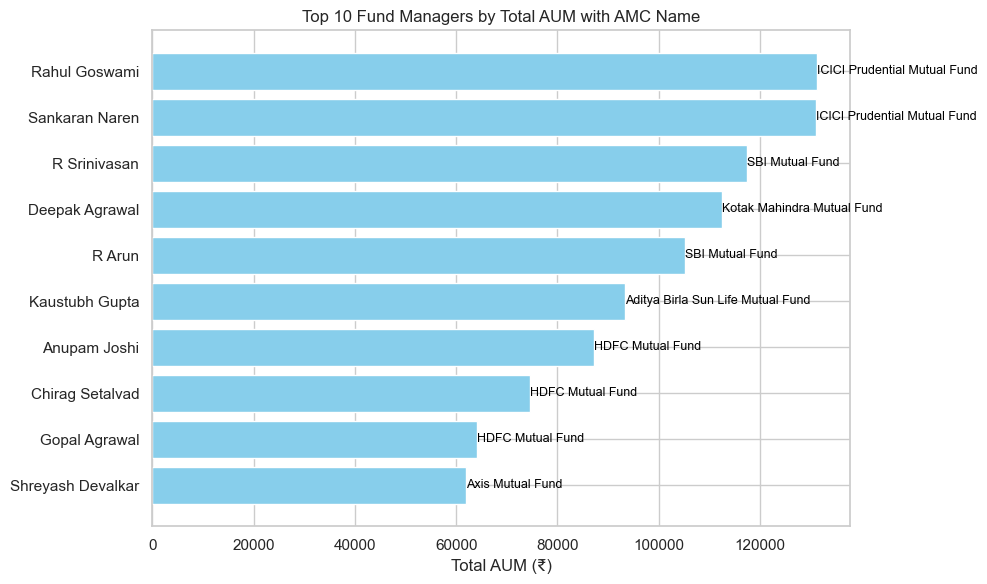

In [17]:
# Use first AMC from list
manager_info['amc_name'] = manager_info['amc_list'].apply(
    lambda x: x[0] if  len(x) > 0 else "Unknown"
)
#manager_info.head(10)
# Top 10 fund managers
top_10_simple = manager_info.sort_values(by='total_aum', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_simple['fund_manager'], top_10_simple['total_aum'], color='skyblue')

# Add AMC names as text labels
for i, (bar, amc) in enumerate(zip(bars, top_10_simple['amc_name'])):
    plt.text(bar.get_width() + 1, i, amc, va='center', fontsize=9, color='black')

plt.xlabel("Total AUM (₹)")
plt.title("Top 10 Fund Managers by Total AUM with AMC Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Goal:
## To define a parameter or column that can be used to judge the performance of any fund

### Steps:
### Scale  ->  wiegh  ->  define  -> judge

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Metrics to include
metrics_cols = ['scheme_name', 'alpha', 'sharpe', 'sortino', 'returns_3yr', 'returns_5yr', 'sd']

# Filter necessary columns
performance_df = df[metrics_cols].copy()

# Drop rows with nulls in any metric
performance_df = performance_df.dropna()


In [19]:
# Initialize scaler
scaler = MinMaxScaler()

metrics_to_scale = ['alpha', 'sharpe', 'sortino', 'returns_3yr', 'returns_5yr', 'sd']

# Fit and transform
scaled_values = scaler.fit_transform(performance_df[metrics_to_scale])

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=[f"{col}_scaled" for col in metrics_to_scale])

# Combine with fund names
scaled_df['scheme_name'] = performance_df['scheme_name'].values

# Reorder columns
scaled_df = scaled_df[['scheme_name'] + [col for col in scaled_df.columns if col != 'scheme_name']]

In [20]:
scaled_df.head(10)

,scheme_name,alpha_scaled,sharpe_scaled,sortino_scaled,returns_3yr_scaled,returns_5yr_scaled,sd_scaled
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,0.384236,0.244240,0.145746,0.046990,0.402930,0.117753
1,Aditya Birla SL Arbitrage Fund,0.366749,0.442396,0.216179,0.022026,0.351648,0.005810
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,0.394828,0.516129,0.363319,0.229075,0.505495,0.133118
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,0.172167,0.396313,0.275453,0.202643,0.476190,0.190058
4,Aditya Birla SL Balanced Advantage Fund,0.378079,0.509217,0.380753,0.224670,0.505495,0.130536
5,Aditya Birla SL Banking&Financial Services-Dir...,0.359606,0.412442,0.267782,0.312775,0.487179,0.326146
6,Aditya Birla SL Banking&PSU Debt Fund,0.438916,0.440092,0.257322,0.051395,0.417582,0.021175
7,Aditya Birla SL CEF – Global Agri Plan-Direct ...,0.374384,0.433180,0.222455,0.383260,0.490842,0.257069
8,Aditya Birla SL Corporate Bond Fund,0.387685,0.500000,0.282427,0.055800,0.421245,0.021433
9,Aditya Birla SL Credit Risk Fund,0.403202,0.527650,0.250349,0.083700,0.413919,0.033957


In [22]:
# Calculate weighted score
scaled_df['score'] = (
    0.3 * scaled_df['sharpe_scaled'] +
    0.2 * scaled_df['sortino_scaled'] +
    0.2 * scaled_df['alpha_scaled'] +
    0.1 * scaled_df['returns_3yr_scaled'] +
    0.1 * scaled_df['returns_5yr_scaled'] -
    0.1 * scaled_df['sd_scaled']
)

# Sort by score
top_funds = scaled_df.sort_values(by='score', ascending=False)

# View top 10
top_funds[['scheme_name', 'score']].head(10)


,scheme_name,score
591,Quant Infrastructure Fund,0.641609
596,Quant Small Cap Fund,0.607554
597,Quant Tax Plan- Direct Growth,0.570135
593,Quant Liquid Plan – Direct Growth,0.557206
587,Quant Absolute Fund,0.547644
611,SBI Contra Fund,0.541386
595,Quant Multi Asset Fund,0.536234
589,Quant Flexi Cap Fund,0.533155
728,Templeton India Equity Income Fund,0.526643
139,Canara Robeco Small Cap Fund,0.518131


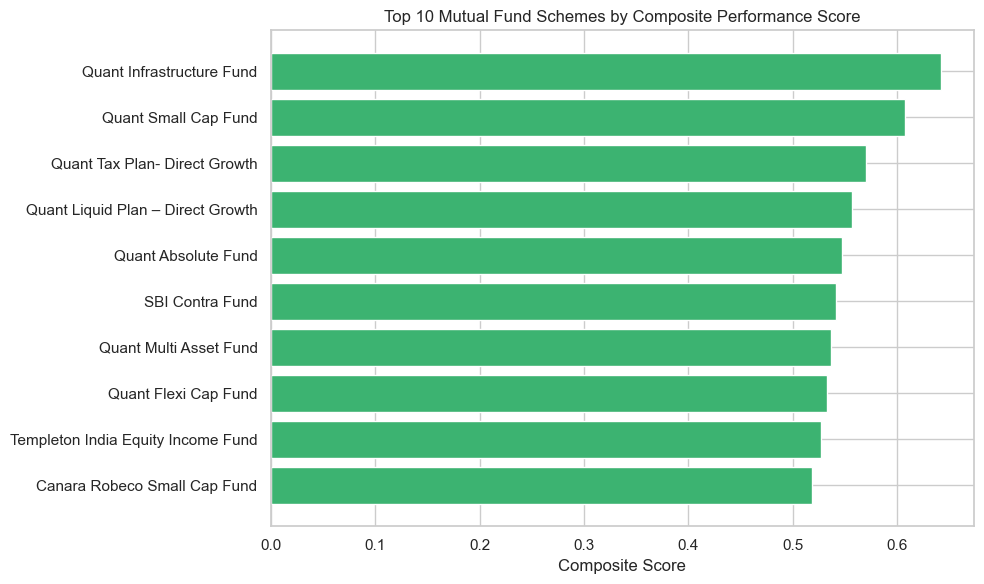

In [23]:

# Select top 10
top_10_plot = top_funds[['scheme_name', 'score']].head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_plot['scheme_name'], top_10_plot['score'], color='mediumseagreen')
plt.xlabel("Composite Score")
plt.title("Top 10 Mutual Fund Schemes by Composite Performance Score")
plt.gca().invert_yaxis()  # Highest score on top
plt.tight_layout()
plt.show()


## Plot Risk (sd) vs Composite score for all funds

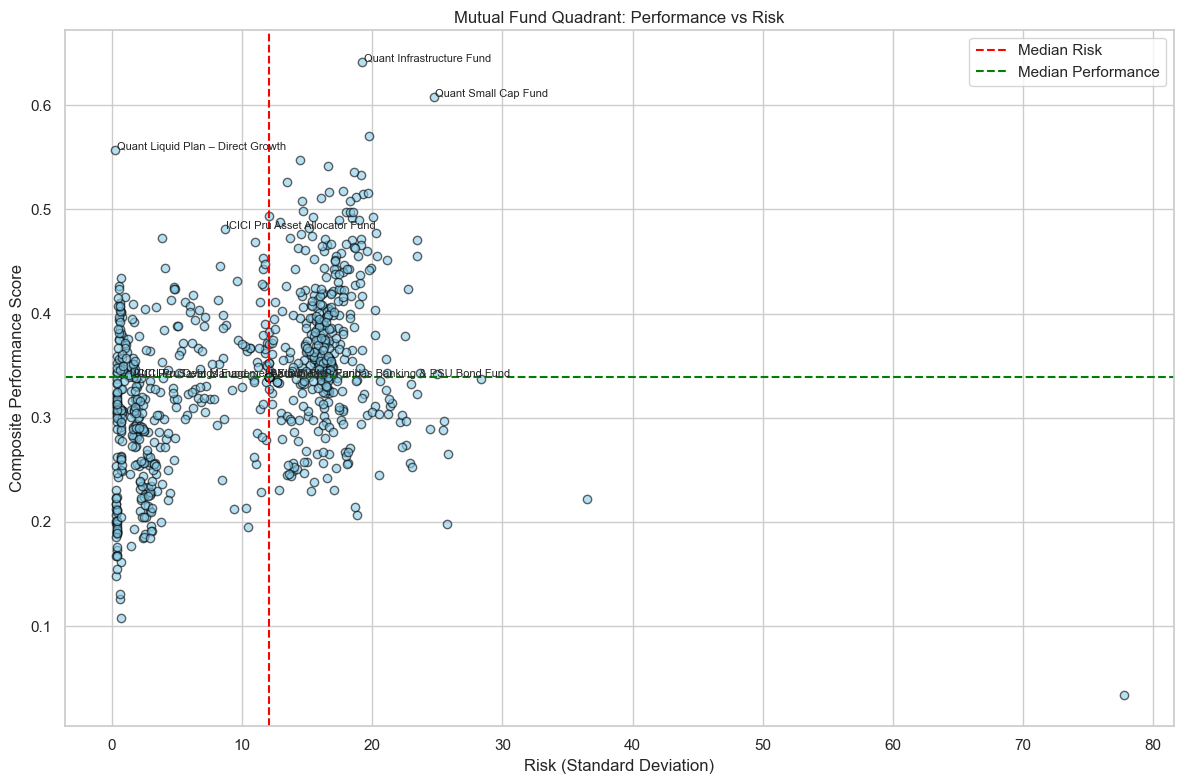

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Use raw SD (not scaled) and score
plot_df = scaled_df.copy()
plot_df['sd_raw'] = performance_df['sd'].values  # raw SD for axis

# Compute medians
score_median = plot_df['score'].median()
sd_median = plot_df['sd_raw'].median()

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    plot_df['sd_raw'], 
    plot_df['score'], 
    alpha=0.6, 
    c='skyblue', 
    edgecolors='black'
)

# Axis labels and grid
plt.axvline(sd_median, color='red', linestyle='--', label='Median Risk')
plt.axhline(score_median, color='green', linestyle='--', label='Median Performance')
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Composite Performance Score")
plt.title("Mutual Fund Quadrant: Performance vs Risk")
plt.grid(True)

# Annotate 2 funds per quadrant
quadrants = {
    'High Perf - Low Risk': plot_df[(plot_df['score'] > score_median) & (plot_df['sd_raw'] < sd_median)],
    'High Perf - High Risk': plot_df[(plot_df['score'] > score_median) & (plot_df['sd_raw'] >= sd_median)],
    'Low Perf - Low Risk': plot_df[(plot_df['score'] <= score_median) & (plot_df['sd_raw'] < sd_median)],
    'Low Perf - High Risk': plot_df[(plot_df['score'] <= score_median) & (plot_df['sd_raw'] >= sd_median)]
}

for label, group in quadrants.items():
    for i, row in group.nlargest(2, 'score').iterrows():  # pick top 2 from each
        plt.text(row['sd_raw'] + 0.1, row['score'], row['scheme_name'], fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()


## Classify them into buckets for better analysis

In [25]:
def classify_category(aum):
    if aum > 10000:
        return 'Large Cap'
    elif aum > 2000:
        return 'Mid Cap'
    else:
        return 'Small Cap'

# Apply to original df
df['fund_category'] = df['fund_size_cr'].apply(classify_category)


In [27]:
df.shape

(789, 21)

In [28]:
print(len(performance_df['scheme_name'].unique()))
print(len(scaled_df['scheme_name'].unique()))
performance_df.head(10)

789
789


,scheme_name,alpha,sharpe,sortino,returns_3yr,returns_5yr,sd
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,2.24,0.24,0.32,6.5,6.9,9.39
1,Aditya Birla SL Arbitrage Fund,1.53,1.10,1.33,4.8,5.5,0.72
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,2.67,1.42,3.44,18.9,9.7,10.58
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,-6.37,0.90,2.18,17.1,8.9,14.99
4,Aditya Birla SL Balanced Advantage Fund,1.99,1.39,3.69,18.6,9.7,10.38
5,Aditya Birla SL Banking&Financial Services-Dir...,1.24,0.97,2.07,24.6,9.2,25.53
6,Aditya Birla SL Banking&PSU Debt Fund,4.46,1.09,1.92,6.8,7.3,1.91
7,Aditya Birla SL CEF – Global Agri Plan-Direct ...,1.84,1.06,1.42,29.4,9.3,20.18
8,Aditya Birla SL Corporate Bond Fund,2.38,1.35,2.28,7.1,7.4,1.93
9,Aditya Birla SL Credit Risk Fund,3.01,1.47,1.82,9.0,7.2,2.90


In [29]:

# Merge raw SD directly into scaled_df from performance_df using scheme_name
scaled_df = scaled_df.merge(
    performance_df[['scheme_name', 'sd']],
    on='scheme_name',
    how='left'
)

# Rename if needed
scaled_df.rename(columns={'sd': 'sd_raw'}, inplace=True)



In [32]:
category_map = df.set_index('scheme_name')['fund_category']
scaled_df['fund_category'] = scaled_df['scheme_name'].map(category_map)

In [33]:
scaled_df.columns

Index(['scheme_name', 'alpha_scaled', 'sharpe_scaled', 'sortino_scaled',
       'returns_3yr_scaled', 'returns_5yr_scaled', 'sd_scaled', 'score',
       'sd_raw', 'fund_category'],
      dtype='object')

In [34]:
# Filter top 20 schemes by score within each fund category
top_schemes_by_category = (
    scaled_df
    .sort_values(by='score', ascending=False)
    .groupby('fund_category')
    .head(20)
)


## Plot top 20 in each category

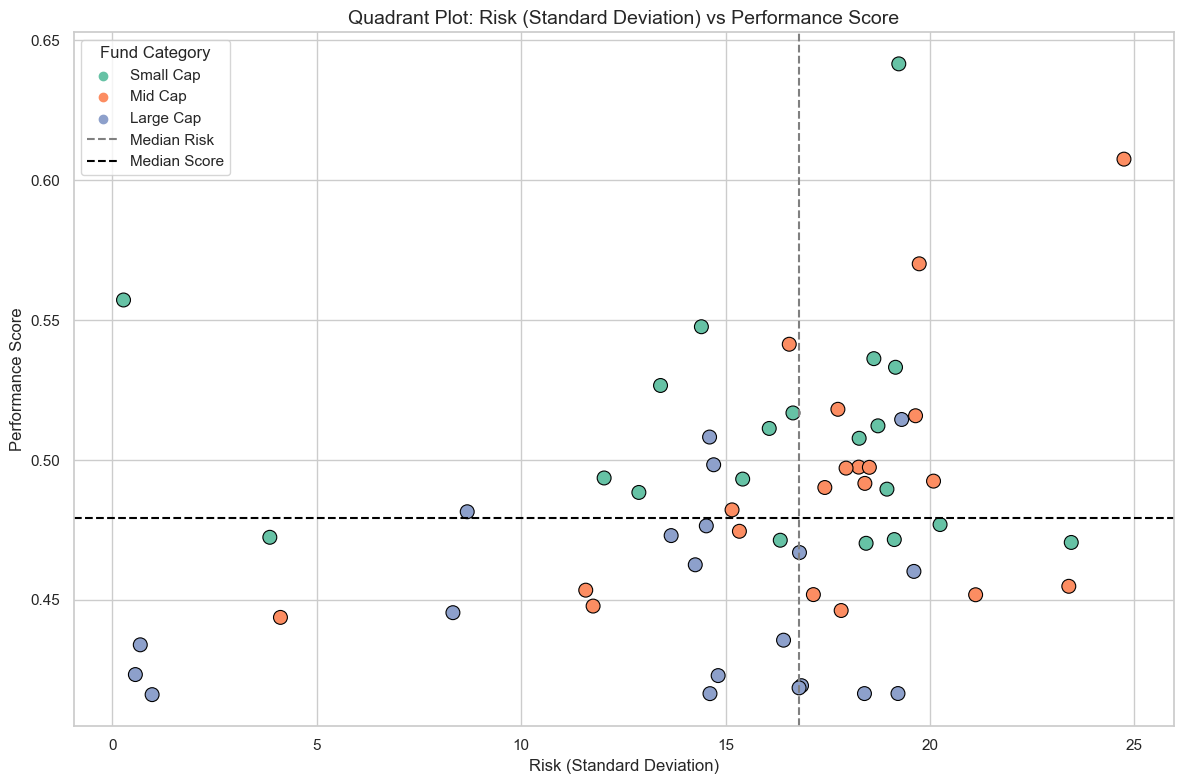

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Scatter plot: Risk vs Performance
sns.scatterplot(
    data=top_schemes_by_category,
    x='sd_raw',        # x-axis: raw standard deviation (risk)
    y='score',         # y-axis: performance score
    hue='fund_category',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# Add median lines to create quadrants
plt.axvline(top_schemes_by_category['sd_raw'].median(), color='gray', linestyle='--', label='Median Risk')
plt.axhline(top_schemes_by_category['score'].median(), color='black', linestyle='--', label='Median Score')

# Labels and title
plt.title("Quadrant Plot: Risk (Standard Deviation) vs Performance Score", fontsize=14)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.legend(title='Fund Category', loc='upper left')
plt.tight_layout()
plt.show()


## label top 2 in each quadrant

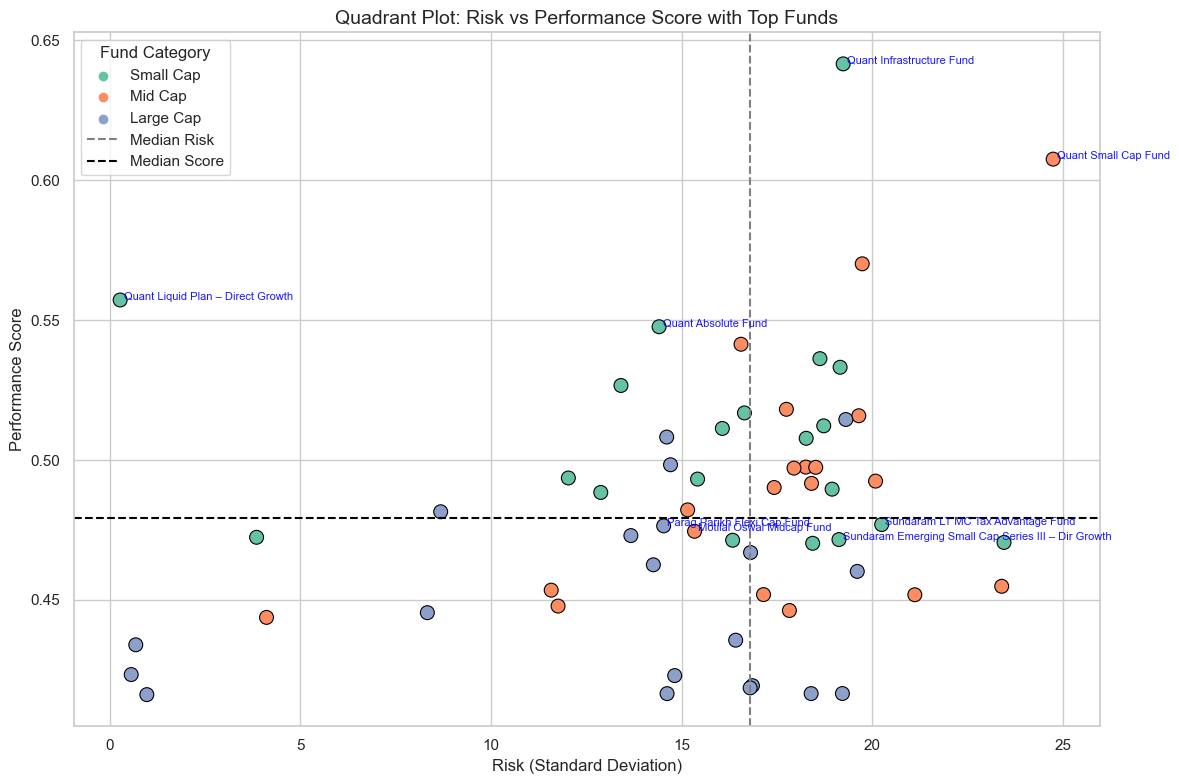

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Plot the scatterplot
sns.scatterplot(
    data=top_schemes_by_category,
    x='sd_raw',
    y='score',
    hue='fund_category',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# Calculate medians
score_median = top_schemes_by_category['score'].median()
sd_median = top_schemes_by_category['sd_raw'].median()

# Draw quadrant lines
plt.axvline(sd_median, color='gray', linestyle='--', label='Median Risk')
plt.axhline(score_median, color='black', linestyle='--', label='Median Score')

# Label standout schemes in each quadrant
quadrants = {
    'High Return - Low Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] > score_median) &
        (top_schemes_by_category['sd_raw'] < sd_median)
    ],
    'High Return - High Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] > score_median) &
        (top_schemes_by_category['sd_raw'] >= sd_median)
    ],
    'Low Return - Low Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] <= score_median) &
        (top_schemes_by_category['sd_raw'] < sd_median)
    ],
    'Low Return - High Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] <= score_median) &
        (top_schemes_by_category['sd_raw'] >= sd_median)
    ],
}

# Add text labels (2 schemes per quadrant)
for label, group in quadrants.items():
    for i, row in group.nlargest(2, 'score').iterrows():
        plt.text(row['sd_raw'] + 0.1, row['score'], row['scheme_name'],
                 fontsize=8, color='blue', alpha=0.9)

# Title and labels
plt.title("Quadrant Plot: Risk vs Performance Score with Top Funds", fontsize=14)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.legend(title='Fund Category', loc='upper left')
plt.tight_layout()
plt.show()


## Add ladder lines for better readability

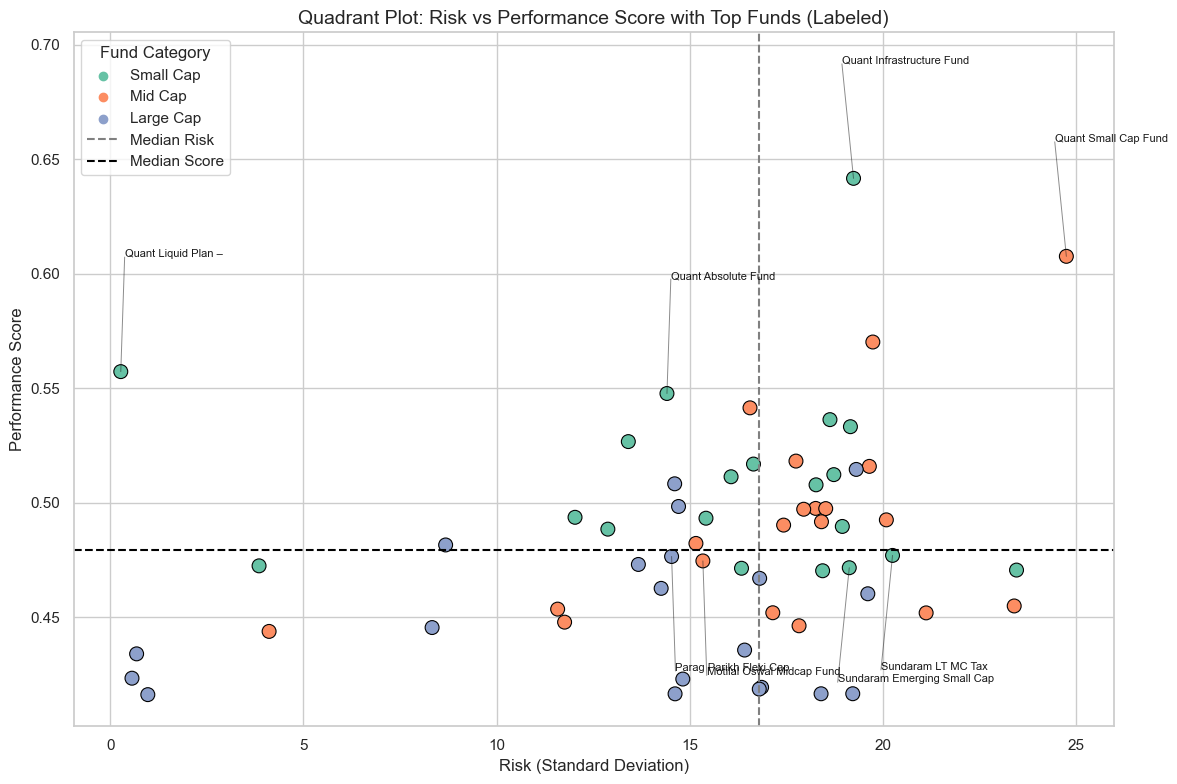

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Helper to shorten scheme names
def clean_label(name, max_words=4):
    return ' '.join(name.split()[:max_words])

plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Scatter plot
sns.scatterplot(
    data=top_schemes_by_category,
    x='sd_raw',
    y='score',
    hue='fund_category',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# Medians for quadrant boundaries
score_median = top_schemes_by_category['score'].median()
sd_median = top_schemes_by_category['sd_raw'].median()

plt.axvline(sd_median, color='gray', linestyle='--', label='Median Risk')
plt.axhline(score_median, color='black', linestyle='--', label='Median Score')

# Quadrant-wise labeling with leader lines
quadrants = {
    'High Return - Low Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] > score_median) & 
        (top_schemes_by_category['sd_raw'] < sd_median)
    ],
    'High Return - High Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] > score_median) & 
        (top_schemes_by_category['sd_raw'] >= sd_median)
    ],
    'Low Return - Low Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] <= score_median) & 
        (top_schemes_by_category['sd_raw'] < sd_median)
    ],
    'Low Return - High Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] <= score_median) & 
        (top_schemes_by_category['sd_raw'] >= sd_median)
    ]
}

# Loop through each quadrant
for label, group in quadrants.items():
    for i, row in group.nlargest(2, 'score').iterrows():
        short_name = clean_label(row['scheme_name'])

        # Set offset based on quadrant
        x_offset = 0.1 if row['sd_raw'] < sd_median else -0.3
        y_offset = 0.05 if row['score'] > score_median else -0.05

        # Label position
        x_text = row['sd_raw'] + x_offset
        y_text = row['score'] + y_offset

        # Draw line from point to label
        plt.plot([row['sd_raw'], x_text], [row['score'], y_text], 'k-', lw=0.7, alpha=0.5)

        # Add text label
        plt.text(x_text, y_text, short_name, fontsize=8, color='black', alpha=0.9)

# Titles and legend
plt.title("Quadrant Plot: Risk vs Performance Score with Top Funds (Labeled)", fontsize=14)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.legend(title='Fund Category', loc='upper left')
plt.tight_layout()
plt.show()


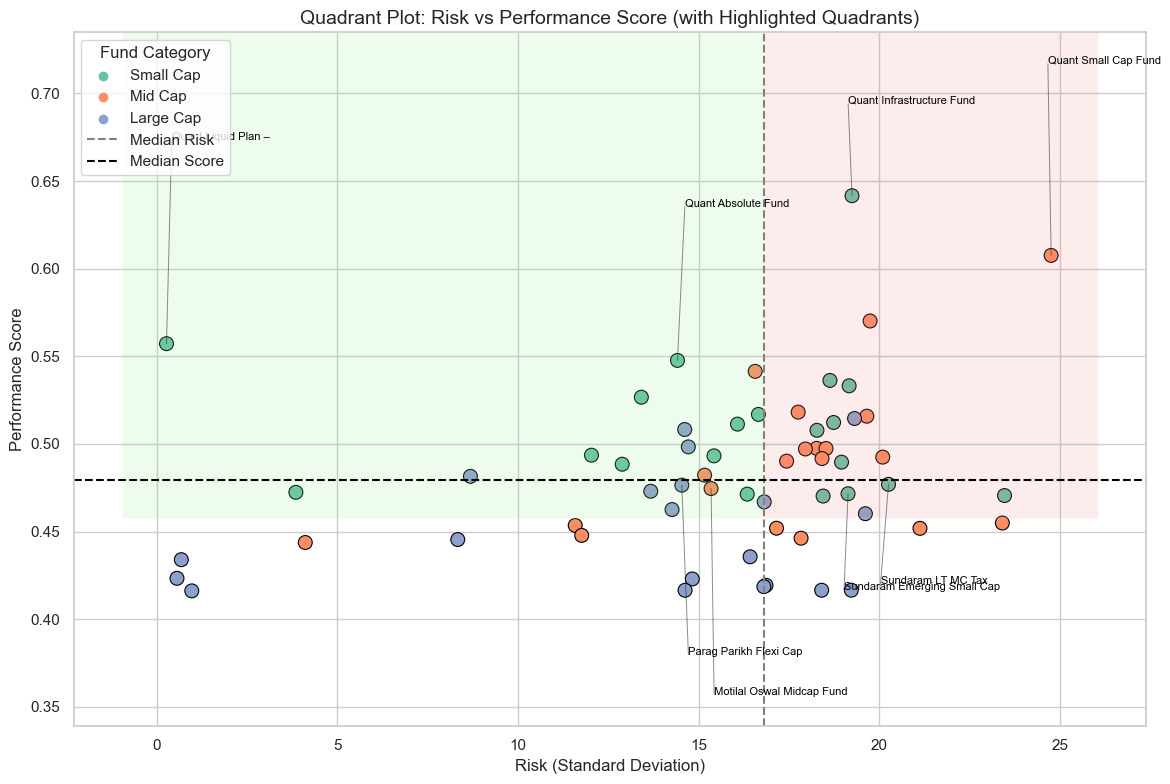

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For reproducibility
np.random.seed(42)

def clean_label(name, max_words=4):
    return ' '.join(name.split()[:max_words])

plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
ax = plt.gca()

# Scatter plot
sns.scatterplot(
    data=top_schemes_by_category,
    x='sd_raw',
    y='score',
    hue='fund_category',
    palette='Set2',
    s=100,
    edgecolor='black',
    ax=ax
)

# Medians
score_median = top_schemes_by_category['score'].median()
sd_median = top_schemes_by_category['sd_raw'].median()

# 🟩 Highlight High Return - Low Risk (Green)
ax.axvspan(xmin=ax.get_xlim()[0], xmax=sd_median,
           ymin=(score_median - ax.get_ylim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]),
           ymax=1, facecolor='lightgreen', alpha=0.15)

# 🟥 Highlight High Return - High Risk (Red/Orange)
ax.axvspan(xmin=sd_median, xmax=ax.get_xlim()[1],
           ymin=(score_median - ax.get_ylim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]),
           ymax=1, facecolor='lightcoral', alpha=0.15)

# Median lines
ax.axvline(sd_median, color='gray', linestyle='--', label='Median Risk')
ax.axhline(score_median, color='black', linestyle='--', label='Median Score')

# Quadrants and labels
quadrants = {
    'High Return - Low Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] > score_median) & 
        (top_schemes_by_category['sd_raw'] < sd_median)
    ],
    'High Return - High Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] > score_median) & 
        (top_schemes_by_category['sd_raw'] >= sd_median)
    ],
    'Low Return - Low Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] <= score_median) & 
        (top_schemes_by_category['sd_raw'] < sd_median)
    ],
    'Low Return - High Risk': top_schemes_by_category[
        (top_schemes_by_category['score'] <= score_median) & 
        (top_schemes_by_category['sd_raw'] >= sd_median)
    ]
}

for label, group in quadrants.items():
    for i, row in group.nlargest(2, 'score').iterrows():
        short_name = clean_label(row['scheme_name'])

        rand_x = np.random.uniform(0.08, 0.25)
        rand_y = np.random.uniform(0.04, 0.12)

        x_offset = rand_x if row['sd_raw'] < sd_median else -rand_x
        y_offset = rand_y if row['score'] > score_median else -rand_y

        x_text = row['sd_raw'] + x_offset
        y_text = row['score'] + y_offset

        ax.plot([row['sd_raw'], x_text], [row['score'], y_text], 'k-', lw=0.7, alpha=0.5)
        ax.text(x_text, y_text, short_name, fontsize=8, color='black')

# Final setup
plt.title("Quadrant Plot: Risk vs Performance Score (with Highlighted Quadrants)", fontsize=14)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.legend(title='Fund Category', loc='upper left')
plt.tight_layout()
plt.show()


#### Get Top 4 funds to invest wit medium risk and good returns

In [40]:
# Calculate thresholds
score_threshold = scaled_df['score'].quantile(0.85)     # top 15% performers
sd_upper_limit = scaled_df['sd_raw'].quantile(0.90)      # not highest risk
sd_lower_limit = scaled_df['sd_raw'].quantile(0.65)      # but not low risk either

# Filter medium-to-high risk but strong performance
filtered_candidates = scaled_df[
    (scaled_df['score'] >= score_threshold) &
    (scaled_df['sd_raw'] >= sd_lower_limit) &
    (scaled_df['sd_raw'] <= sd_upper_limit)
]

# Sort by score and pick top 4
top_4_funds = filtered_candidates.sort_values(by='score', ascending=False).head(4)

# Show final selection
top_4_funds[['scheme_name', 'fund_category', 'score', 'sd_raw']]


,scheme_name,fund_category,score,sd_raw
611,SBI Contra Fund,Mid Cap,0.541386,16.56
139,Canara Robeco Small Cap Fund,Mid Cap,0.518131,17.75
441,Kotak Infrastructure & Ecoc. Reform-SP-DirGrowth,Small Cap,0.516829,16.65
646,SBI Tax Advantage Fund,Small Cap,0.511286,16.07


## Goal:
## Recommend the top N mutual funds based on user preferences:

#### > using "sd_raw" in "scaled_df" as proxy for risk level

Recommend the top 3–5 mutual funds based on user preferences:

🔸 Inputs from the user:
Risk tolerance – Low / Medium / High

Investment horizon – Short (≤3 years), Medium (~5 years), Long (>5 years)

We will map this to:

sd_raw (Standard Deviation as a proxy for risk)

returns_3yr or returns_5yr depending on horizon

score (our composite score)

In [41]:
# Define risk bands based on sd_raw (you can tune these)
def classify_risk(sd):
    if sd <= 10:
        return "Low"
    elif sd <= 15:
        return "Medium"
    else:
        return "High"

# Add a 'risk_band' column
scaled_df['risk_band'] = scaled_df['sd_raw'].apply(classify_risk)


In [42]:
scaled_df.head()

,scheme_name,alpha_scaled,sharpe_scaled,sortino_scaled,returns_3yr_scaled,returns_5yr_scaled,sd_scaled,score,sd_raw,fund_category,risk_band
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,0.384236,0.244240,0.145746,0.046990,0.402930,0.117753,0.212485,9.39,Small Cap,Low
1,Aditya Birla SL Arbitrage Fund,0.366749,0.442396,0.216179,0.022026,0.351648,0.005810,0.286091,0.72,Mid Cap,Low
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,0.394828,0.516129,0.363319,0.229075,0.505495,0.133118,0.366613,10.58,Small Cap,Medium
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,0.172167,0.396313,0.275453,0.202643,0.476190,0.190058,0.257296,14.99,Small Cap,Medium
4,Aditya Birla SL Balanced Advantage Fund,0.378079,0.509217,0.380753,0.224670,0.505495,0.130536,0.364494,10.38,Mid Cap,Medium


In [75]:
scaled_df['risk_band'].value_counts()

risk_band
Low       347
High      302
Medium    140
Name: count, dtype: int64

In [43]:
def recommend_funds(risk_tolerance, investment_horizon, top_n=5):
    # Filter by risk
    filtered = scaled_df[scaled_df['risk_band'].str.lower() == risk_tolerance.lower()]

    # Select return column based on horizon
    if investment_horizon.lower() == 'short':
        filtered = filtered.dropna(subset=['returns_3yr_scaled'])
        filtered['relevant_return'] = filtered['returns_3yr_scaled']
    elif investment_horizon.lower() == 'medium':
        filtered = filtered.dropna(subset=['returns_5yr_scaled'])
        filtered['relevant_return'] = filtered['returns_5yr_scaled']
    else:
        # For long-term, average both if available
        filtered = filtered.dropna(subset=['returns_3yr_scaled', 'returns_5yr_scaled'])
        filtered['relevant_return'] = (filtered['returns_3yr_scaled'] + filtered['returns_5yr_scaled']) / 2

    # Final score (weight can be adjusted)
    filtered['final_score'] = 0.6 * filtered['score'] + 0.4 * filtered['relevant_return']

    # Sort and select top
    top_recommendations = filtered.sort_values(by='final_score', ascending=False).head(top_n)

    return top_recommendations[['scheme_name', 'fund_category', 'sd_raw', 'score', 'final_score']]


In [44]:
recommend_funds(risk_tolerance='medium', investment_horizon='medium', top_n=5)


,scheme_name,fund_category,sd_raw,score,final_score
587,Quant Absolute Fund,Small Cap,14.41,0.547644,0.668513
77,AXIS Small Cap Fund,Large Cap,14.71,0.498306,0.643306
566,Parag Parikh Flexi Cap Fund,Large Cap,14.53,0.476462,0.603826
728,Templeton India Equity Income Fund,Small Cap,13.41,0.526643,0.588513
341,ICICI Pru Value Discovery Fund,Large Cap,14.61,0.508209,0.583314


## NOTE (updated as I am doing the project)
As I was implementing my recommendation system for mutual funds based on "risk_tolerance" & "investment_horizon"
I noticed fund was categorized as Large cap even though the name itself suggested it is small cap.

All the analyis till this point was wasted because of the below mentioned mistake.

To categorize the funds into Large, Mid, Small cap; I used the column fund_size_cr which is not a measure of where the funds in the MF are invested rather the measure of how mush was invested by public in that fund.

This was a huge mistake while categorizinf funds.

If you went back and analyse the scatter plots above you can observe the dots form categorize are not clustered to gether and are scattered and mingled.

### I fix these issues in other notebook attched named 'INDIAN_MutualFund_EDA-Fixed'

I have added the lessons from these in the conclusion there.